In [1]:
import json
from backend.models import UserDocument
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, "cv_1")

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: 
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé brut: Fiche de Poste - Machine Learning Engineer

Localisation : Paris, France (Hybrid)

Type de Contrat : CDI

Experience : 3+ ans

Salaire : 55k - 75k EUR selon experience

Secteur : Tech / IA / Data


A propos de nous

Nous sommes une startup innovante specialisee dans l'intelligence artificielle et le traitement des donnees a grande echelle. Nous developpons des solutions de Machine Learning et Deep Learning pour optimiser la prise de decision et au

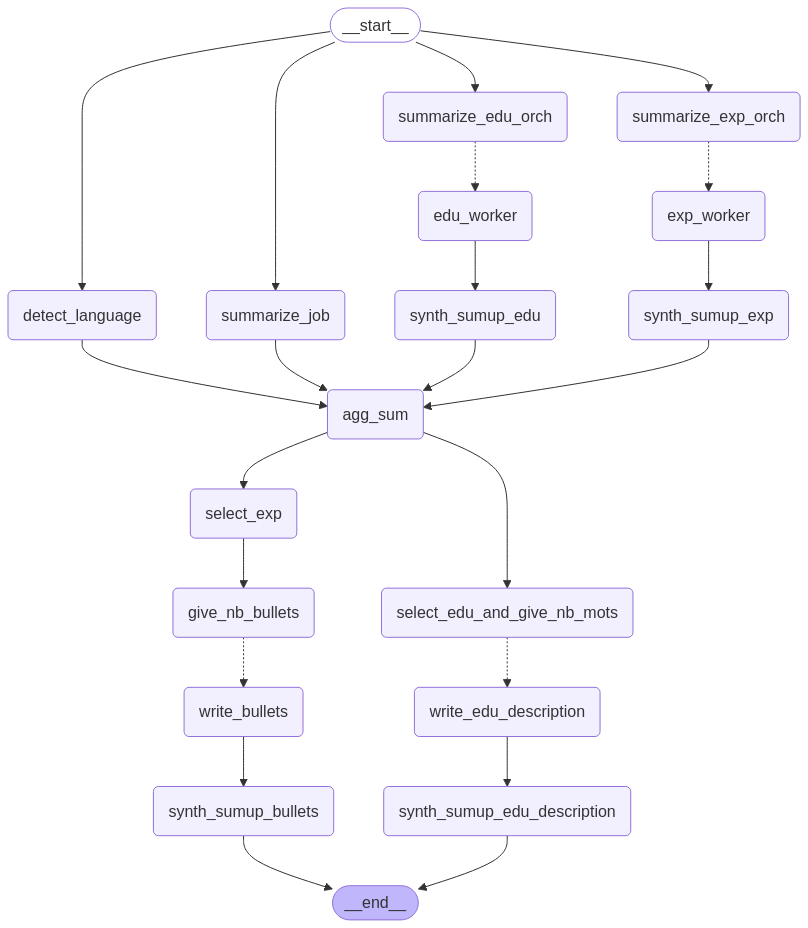

In [3]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.gen_cv_chain import create_cv_chain
from IPython.display import Image, display

graph = create_cv_chain().compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
result = graph.invoke(cv_state)



In [ ]:
for exp in result['experiences']:
    print(f"Description brute: {exp.description_raw}")
    print(f"Résumé: {exp.summary}")

In [ ]:
for exp in result['experiences']:
    print(f"Bullets pour l'expérience '{exp.title_raw}' chez '{exp.company_raw}':")
    for bullet in exp.bullets:
        print(f"- {bullet}")
    print("\n")


In [ ]:
for edu in result['education']:
    print(f"Description brute: {edu.description_raw}")
    print(f"Résumé: {edu.summary}")
    print(f"Description générée: {edu.description_generated}")
